<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-time-series" data-toc-modified-id="Plot-time-series-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot time series</a></span></li></ul></div>

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Plot time series

We plot the time series of each variable in the file. We just plot relevant variables by getting var names from a list saved in this directory ([h1_varnames](h1_varnames)).


In [14]:
ds = xr.open_dataset("/home/disk/eos1/bloss/Runs/PIRE/DP-SCREAM/Tests/RCE_SMALL_al/scream_dp_RCE_SMALL_al.eam.h1.2000-01-01-00000.nc")
# list(ds.keys()) # prints a list of data variable names > h1_varnames
ds

<xarray.Dataset>
Dimensions:        (ncol: 11664, lev: 128, ilev: 129, swband: 14, lwband: 16,
                    P3_input_dim: 16, P3_output_dim: 32, time: 338, nbnd: 2)
Coordinates:
  * lev            (lev) float64 2.58 3.23 3.88 4.597 ... 991.0 994.9 998.5
  * ilev           (ilev) float64 2.255 2.905 3.555 4.205 ... 992.9 997.0 1e+03
  * swband         (swband) float64 2.925e+03 3.625e+03 ... 4.4e+04 1.71e+03
  * lwband         (lwband) float64 130.0 375.0 565.0 ... 2.535e+03 2.965e+03
  * P3_input_dim   (P3_input_dim) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * P3_output_dim  (P3_output_dim) int32 1 2 3 4 5 6 7 ... 26 27 28 29 30 31 32
  * time           (time) object 2000-01-01 00:00:00 ... 2000-01-15 01:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/74)
    lat            (ncol) float64 ...
    lon            (ncol) float64 ...
    area           (ncol) float64 ...
    hyam           (lev) float64 ...
    hybm           (lev) float64 ...
    P0             float64 ...
    ...             ...
    TMQ            (time, ncol) float32 ...
    TREFHT         (time, ncol) float32 ...
    TS             (time, ncol) float32 ...
    WINDSPD_10M    (time, ncol) float32 ...
    crm_grid_x     (time, ncol) float32 ...
    crm_grid_y     (time, ncol) float32 ...
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         20c5f7518c
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/u/home/pblossey/work/E3SM/inputdata/atm/cam/ini...
    topography_file:   /glade/u/home/pblossey/work/E3SM/inputdata/atm/cam/top...
    time_period_freq:  hour_1

In [21]:
# list of relevant var names modified from 'list(ds.keys())'
varnames = open("h1_varnames","r").read().split("\n")  
len(varnames)

45

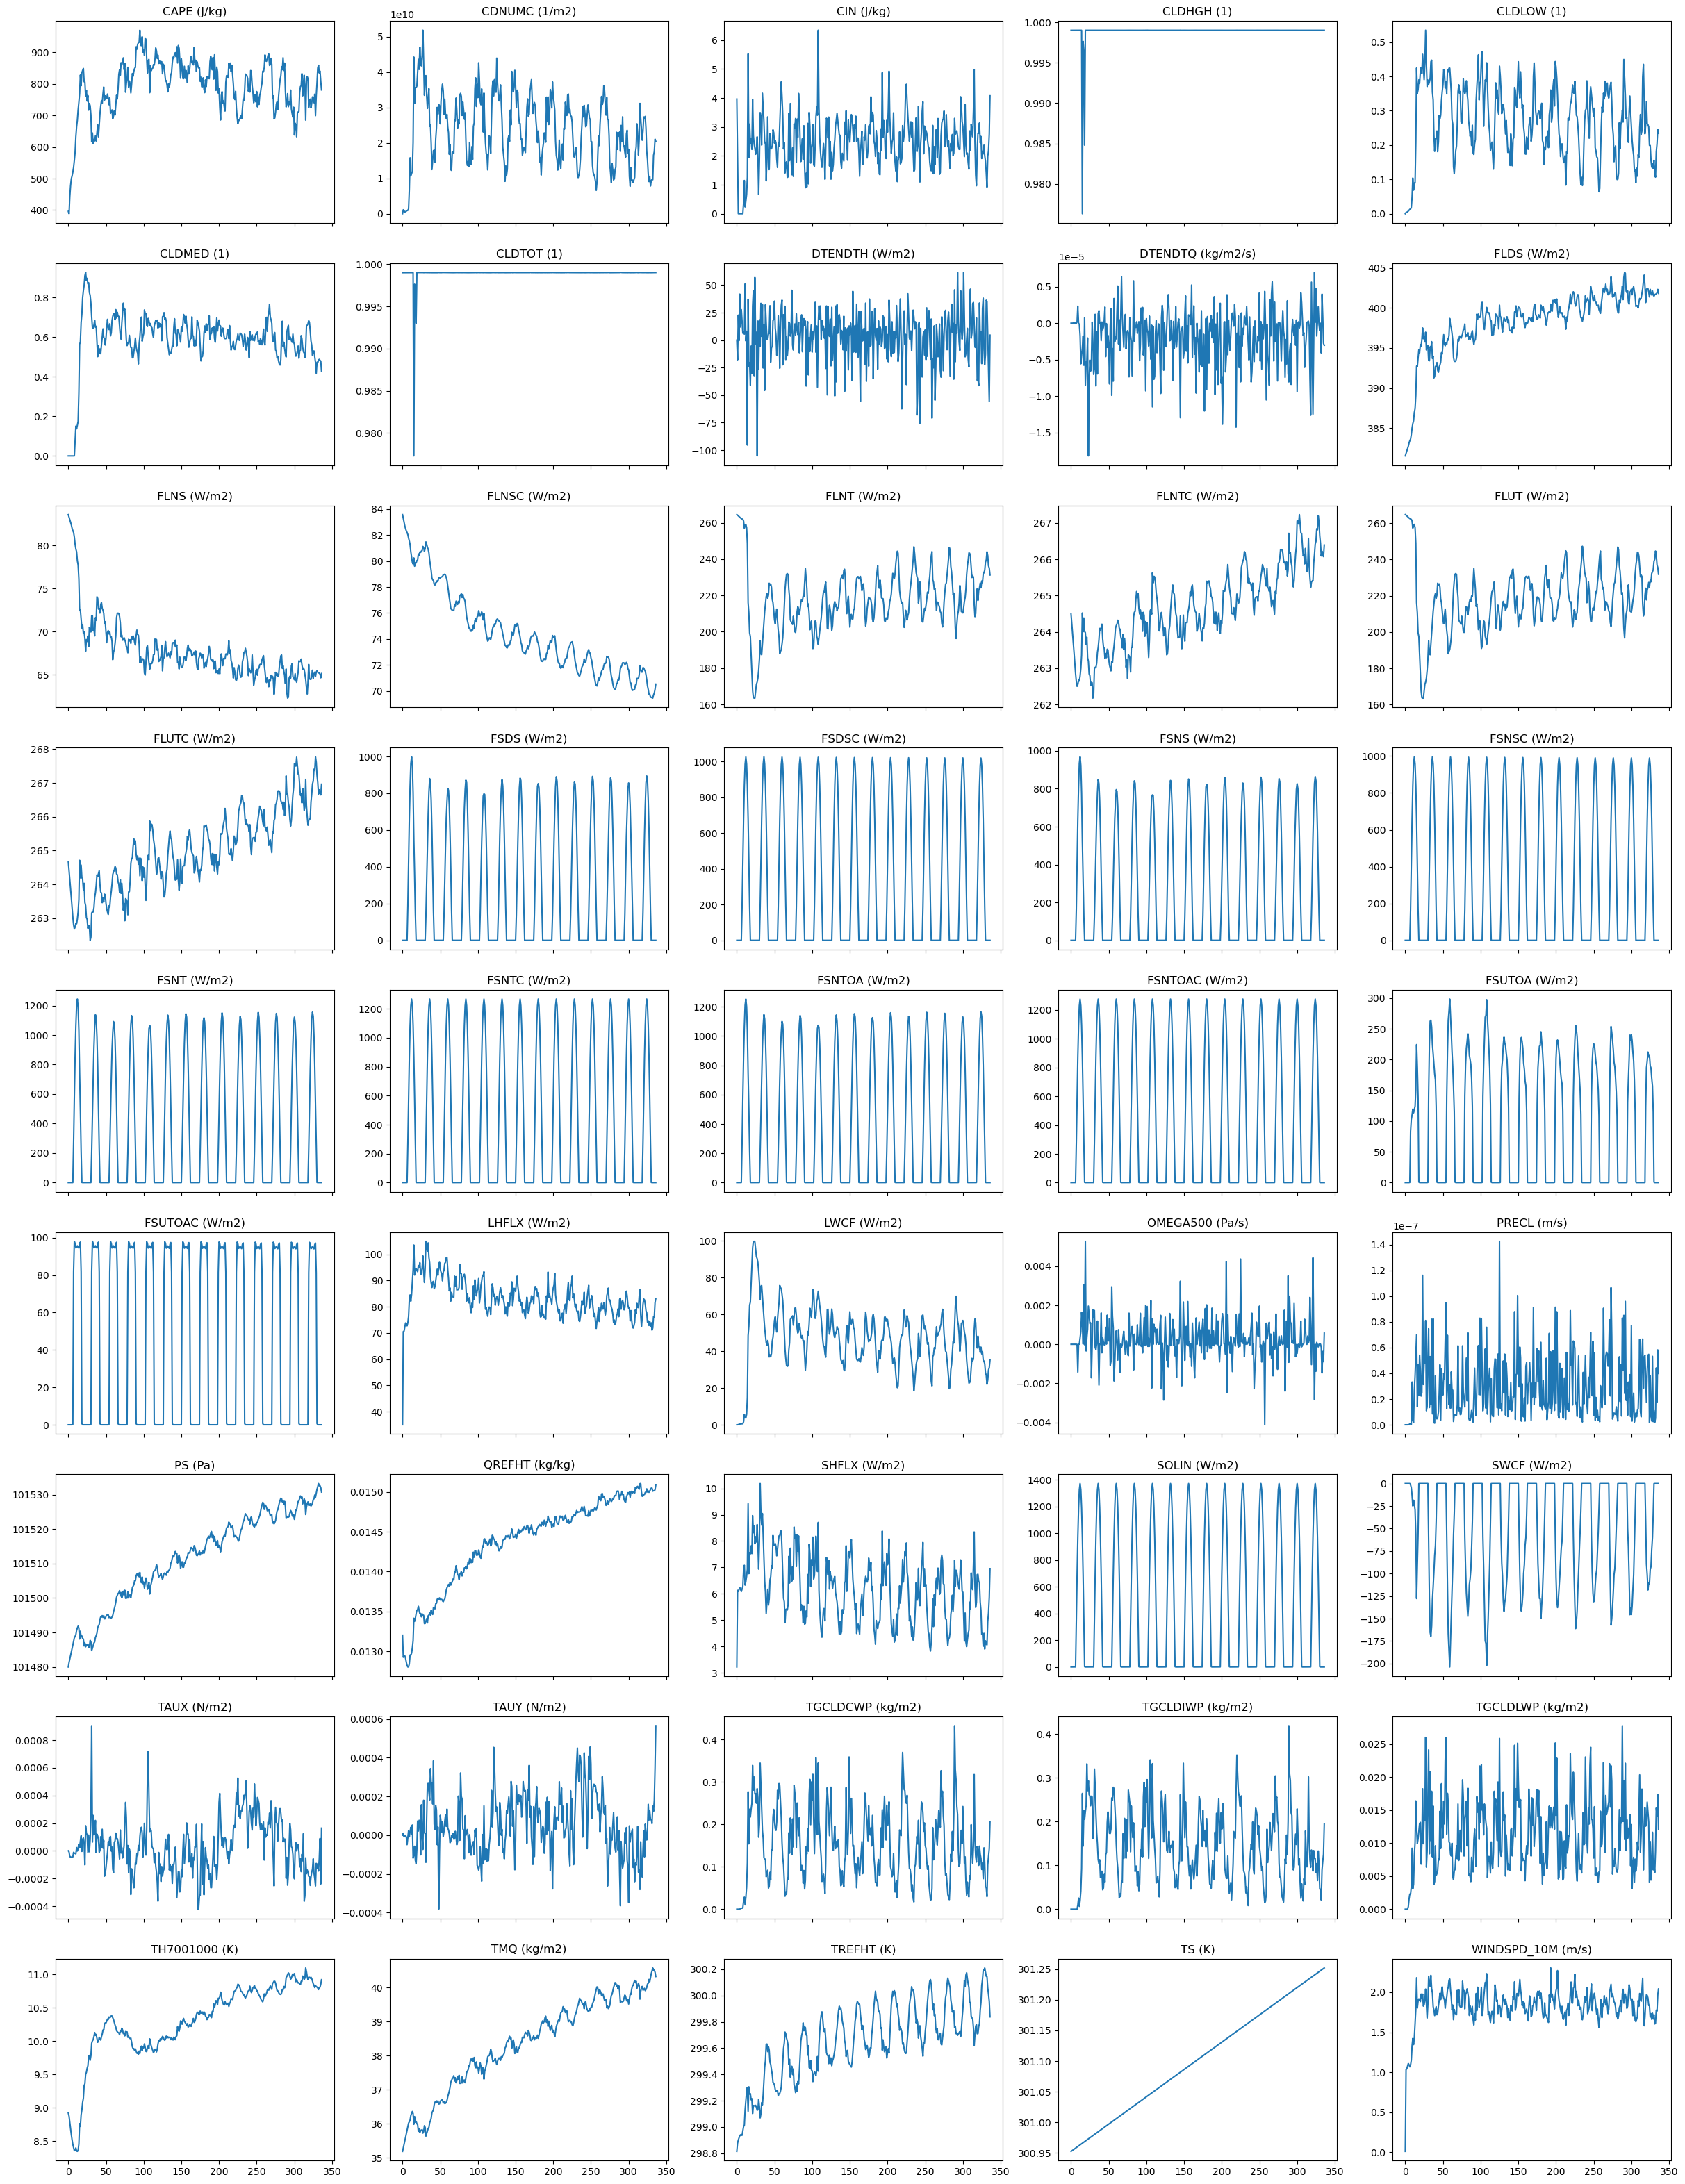

In [31]:
fig, ax = plt.subplots(9,5, figsize=(30,40), sharex=True)
n = 0
for i in range(9):
    for j in range(5):
        var = varnames[n]
        ax[i,j].plot(ds[var].mean(dim=["ncol"]))
        ax[i,j].set_title(var+" ("+str(ds[var].units)+")")
        n+=1
plt.savefig("plots/h1_timeseries.png",dpi=140)
plt.show()